In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '3'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs

In [4]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

In [5]:
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [6]:
X_aniso = np.dot(X, transformation)  # Anisotropic blobs

In [7]:
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance

In [8]:
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

In [9]:
def make_scatterplot(X, hue, ax=None):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hue, palette='Set1', alpha=.3, ax=ax)
    if ax is not None:
        ax.legend().remove()
    else:
        plt.legend().remove()

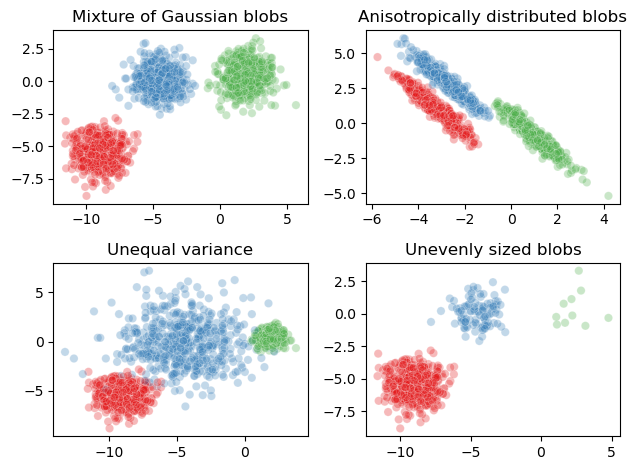

In [10]:
# Ground truth clusters
fig, ax = plt.subplots(2, 2)
make_scatterplot(X, y, ax[0, 0])
ax[0, 0].set_title('Mixture of Gaussian blobs')
make_scatterplot(X_aniso, y, ax[0, 1])
ax[0, 1].set_title('Anisotropically distributed blobs')
make_scatterplot(X_varied, y_varied, ax[1, 0])
ax[1, 0].set_title('Unequal variance')
make_scatterplot(X_filtered, y_filtered, ax[1, 1])
ax[1, 1].set_title('Unevenly sized blobs')
plt.tight_layout()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
pipe = Pipeline([('scaler', StandardScaler()), ('k_means', KMeans(3, n_init=10))])

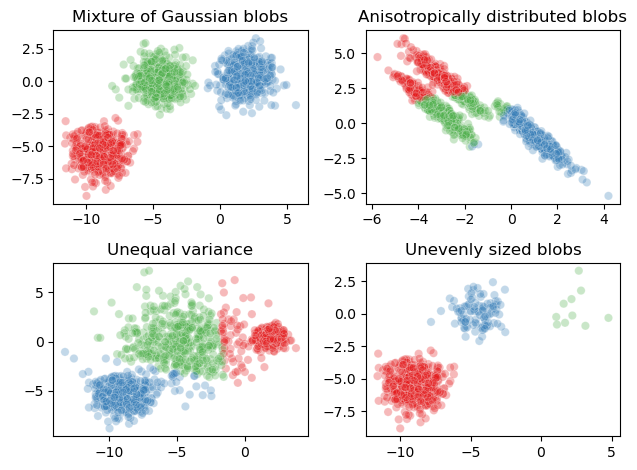

In [19]:
# K-means clustering results
fig, ax = plt.subplots(2, 2)
make_scatterplot(X, pipe.fit_predict(X), ax[0, 0])
ax[0, 0].set_title('Mixture of Gaussian blobs')
make_scatterplot(X_aniso, pipe.fit_predict(X_aniso), ax[0, 1])
ax[0, 1].set_title('Anisotropically distributed blobs')
make_scatterplot(X_varied, pipe.fit_predict(X_varied), ax[1, 0])
ax[1, 0].set_title('Unequal variance')
make_scatterplot(X_filtered, pipe.fit_predict(X_filtered), ax[1, 1])
ax[1, 1].set_title('Unevenly sized blobs')
plt.tight_layout()

In [20]:
# Unevenly sized blobs: Run multiple iterations to increase the chance of finding the global optimum